In [232]:
#Importing libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# NLTK VADER for sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bhard\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [233]:
news_tables = {}
tickers = ['AMZN', 'TSLA', 'GOOG']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [234]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Mar-10-22',
  '11:47AM',
  'Trading Amazon Stock After News of a 20-for-1 Stock Split'],
 ['AMZN',
  'Mar-10-22',
  '11:46AM',
  "Amazon stock split isn't the tech giant's only important news"],
 ['AMZN', 'Mar-10-22', '11:40AM', 'Why Amazon Stock Popped Today'],
 ['AMZN',
  'Mar-10-22',
  '11:21AM',
  'Amazon Stock Split and Buyback Cheered On by Wall Street. Heres Why.'],
 ['AMZN',
  'Mar-10-22',
  '10:54AM',
  'Amazon Split and Buyback Could Deliver Much-Needed Liftoff'],
 ['AMZN',
  'Mar-10-22',
  '10:53AM',
  'Amazon Announces 20-for-1 Stock Split, $10 Billion Buyback Plan'],
 ['AMZN',
  'Mar-10-22',
  '10:47AM',
  "Amazon's Stock Split May Solve One Its Biggest Problem, And It's Not The Dow"],
 ['AMZN',
  'Mar-10-22',
  '10:15AM',
  'Stock Picks: Nvidia, Amazon Reveal 7 Telltale Traits Of Winning Stocks'],
 ['AMZN',
  'Mar-10-22',
  '10:14AM',
  'Amazon (AMZN) to Split Stock in 20 to Attract More Investors'],
 ['AMZN',
  'Mar-10-22',
  '10:08AM',
  'Inflation Hits New

In [235]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['AMZN',
  'Mar-10-22',
  '11:47AM',
  'Trading Amazon Stock After News of a 20-for-1 Stock Split'],
 ['AMZN',
  'Mar-10-22',
  '11:46AM',
  "Amazon stock split isn't the tech giant's only important news"],
 ['AMZN', 'Mar-10-22', '11:40AM', 'Why Amazon Stock Popped Today'],
 ['AMZN',
  'Mar-10-22',
  '11:21AM',
  'Amazon Stock Split and Buyback Cheered On by Wall Street. Heres Why.'],
 ['AMZN',
  'Mar-10-22',
  '10:54AM',
  'Amazon Split and Buyback Could Deliver Much-Needed Liftoff'],
 ['AMZN',
  'Mar-10-22',
  '10:53AM',
  'Amazon Announces 20-for-1 Stock Split, $10 Billion Buyback Plan'],
 ['AMZN',
  'Mar-10-22',
  '10:47AM',
  "Amazon's Stock Split May Solve One Its Biggest Problem, And It's Not The Dow"],
 ['AMZN',
  'Mar-10-22',
  '10:15AM',
  'Stock Picks: Nvidia, Amazon Reveal 7 Telltale Traits Of Winning Stocks'],
 ['AMZN',
  'Mar-10-22',
  '10:14AM',
  'Amazon (AMZN) to Split Stock in 20 to Attract More Investors'],
 ['AMZN',
  'Mar-10-22',
  '10:08AM',
  'Inflation Hits New

In [236]:
date_scrape

['06:33PM']

In [237]:
pd.to_datetime('Jan-01-22').strftime("%Y-%m-%d")

'2022-01-01'

In [238]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

# parsed_and_scored_news.head(50)

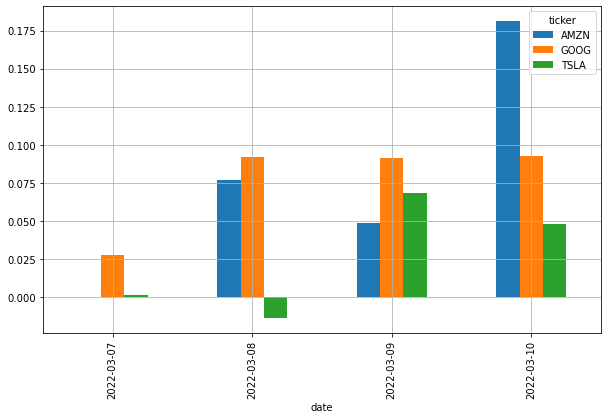

In [239]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()